## Volatility
### Microstructure noise determination

In [1]:
#Set up dependencies
import pandas as pd
import numpy as np
import io
import requests
from datetime import datetime, timedelta

In [2]:
#Load in dataframes
spx_df = pd.read_csv("Cleaned_SPX_Data.csv")
spx_df = spx_df.drop(columns=['Unnamed: 0'])

tweet_df = pd.read_csv("mergedata_%change.csv")
tweet_df = tweet_df.drop(columns=['Unnamed: 0','Source'])
tweet_df = tweet_df.rename(columns={"Date Ti": "Date T_0", "SPX Ti": "SPX T_0", "Date Tf": "Date T_5", "SPX Tf": "SPX T_5"}) 

In [107]:
#SPX Full Data 
spx_df.head()

,Date,Close
0,20170102 1801,2243.00
1,20170102 1802,2243.25
2,20170102 1803,2243.00
3,20170102 1804,2243.75
4,20170102 1805,2243.75


In [109]:
#Twitter Data
tweet_df.head()

,SPX T_0,Date T_5,SPX T_5,Tweet,Date T_0,Retweets,Favorites,SA,% Change SPX
0,2244.00,20170102 1849,2244.25,I thought and felt I would win big easily over...,20170102 1844,13437,62670,1,0.011141
1,2242.75,20170103 1235,2243.25,General Motors is sending Mexican made model o...,20170103 1230,18864,73104,1,0.022294
2,2240.75,20170103 1251,2241.00,People must remember that ObamaCare just doesn...,20170103 1246,14481,58809,-1,0.011157
3,2241.00,20170103 1256,2242.75,"The Democrat Governor.of Minnesota said ""The A...",20170103 1251,12599,53372,-1,0.078090
4,2245.25,20170103 1508,2245.50,With all that Congress has to work on do they ...,20170103 1503,10851,43062,-1,0.011135


In [44]:
#Create arrays of time 5 prior to +6 minutes after Tweet
neg_time = [-5, -4, -3, -2, -1, 0]
pos_time = [1, 2, 3, 4, 5, 6]

#Call out Arrays
t_list_sub_5 = []
t_list_sub_4 = []
t_list_sub_3 = []
t_list_sub_2 = []
t_list_sub_1 = []
t_list_sub_0 = []
t_list_plus_1 = []
t_list_plus_2 = []
t_list_plus_3 = []
t_list_plus_4 = []
t_list_plus_5 = []
t_list_plus_6 = []


#Subract or add time from t_0 of tweet
#e.g. variables def: t_sub_5 = Time, 5 minutes prior to tweet
#e.g. variables def: t_plus_3 = Time, 3 minutes after tweet

for row, index in tweet_df.iterrows():
    t_sub_5 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -5)).strftime('%Y%m%d %H%M')
    t_list_sub_5.append(t_sub_5)
    t_sub_4 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -4)).strftime('%Y%m%d %H%M')
    t_list_sub_4.append(t_sub_4)
    t_sub_3 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -3)).strftime('%Y%m%d %H%M')
    t_list_sub_3.append(t_sub_3)
    t_sub_2 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -2)).strftime('%Y%m%d %H%M')
    t_list_sub_2.append(t_sub_2)
    t_sub_1 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -1)).strftime('%Y%m%d %H%M')
    t_list_sub_1.append(t_sub_1)
    t_sub_0 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M')).strftime('%Y%m%d %H%M')
    t_list_sub_0.append(t_sub_0)
               
    t_plus_1 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 1)).strftime('%Y%m%d %H%M')
    t_list_plus_1.append(t_plus_1)
    t_plus_2 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 2)).strftime('%Y%m%d %H%M')
    t_list_plus_2.append(t_plus_2) 
    t_plus_3 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 3)).strftime('%Y%m%d %H%M')
    t_list_plus_3.append(t_plus_3)
    t_plus_4 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 4)).strftime('%Y%m%d %H%M')
    t_list_plus_4.append(t_plus_4)
    t_plus_5 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 5)).strftime('%Y%m%d %H%M')
    t_list_plus_5.append(t_plus_5)
    t_plus_6 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 6)).strftime('%Y%m%d %H%M')
    t_list_plus_6.append(t_plus_6) 
        

2955


In [46]:
#NOTE: This cell will take about 30 minutes to run

#Matching each time calculated above with an associated stock value.
#Output is 12 arrays that represent the volatility of the stock leading up to and after the tweet.

#Dimension arrays
vol_sub_54_list = []
vol_sub_43_list = []
vol_sub_32_list = []
vol_sub_21_list = []
vol_sub_10_list = []
vol_sub_01_list = []
vol_plus_01_list = []
vol_plus_12_list = []
vol_plus_23_list = []
vol_plus_34_list = []
vol_plus_45_list = []
vol_plus_56_list = []


#Logmaritmic volatility equation taken from: https://quant.stackexchange.com/questions/2589/how-to-calculate-historical-intraday-volatility
#Volatility delta_t is 1 minute

for t_sub_5, t_sub_4 in zip(t_list_sub_5, t_list_sub_4):
    try:
        spx_sub_5 = spx_df.loc[spx_df['Date'] == t_sub_5, 'Close'].iloc[0]
        spx_sub_4 = spx_df.loc[spx_df['Date'] == t_sub_4, 'Close'].iloc[0]
        vol_sub_54 = np.log(spx_sub_4 / spx_sub_5)
#         print(vol_sub_54)               #--Un-comment if you want to track progress
        vol_sub_54_list.append(vol_sub_54)
    except IndexError:
        vol_sub_54_list.append("No SPX data avail.")
#         print("No SPX data avail.")     #--Un-comment if you want to track progress
print(f'Vol List 1 of 11 Complete')

for t_sub_4, t_sub_3 in zip(t_list_sub_4, t_list_sub_3):
    try:
        spx_sub_4 = spx_df.loc[spx_df['Date'] == t_sub_4, 'Close'].iloc[0]
        spx_sub_3 = spx_df.loc[spx_df['Date'] == t_sub_3, 'Close'].iloc[0]
        vol_sub_43 = np.log(spx_sub_3 / spx_sub_4)
        vol_sub_43_list.append(vol_sub_43)
    except IndexError:
        vol_sub_43_list.append("No SPX data avail.")
print(f'Vol List 2 of 11 Complete')

for t_sub_3, t_sub_2 in zip(t_list_sub_3, t_list_sub_2):
    try:
        spx_sub_3 = spx_df.loc[spx_df['Date'] == t_sub_3, 'Close'].iloc[0]
        spx_sub_2 = spx_df.loc[spx_df['Date'] == t_sub_2, 'Close'].iloc[0]
        vol_sub_32 = np.log(spx_sub_2 / spx_sub_3)
        vol_sub_32_list.append(vol_sub_32)
    except IndexError:
        vol_sub_32_list.append("No SPX data avail.")
print(f'Vol List 3 of 11 Complete')

for t_sub_2, t_sub_1 in zip(t_list_sub_2, t_list_sub_1):
    try:
        spx_sub_2 = spx_df.loc[spx_df['Date'] == t_sub_2, 'Close'].iloc[0]
        spx_sub_1 = spx_df.loc[spx_df['Date'] == t_sub_1, 'Close'].iloc[0]
        vol_sub_21 = np.log(spx_sub_1 / spx_sub_2)
        vol_sub_21_list.append(vol_sub_21)
    except IndexError:
        vol_sub_21_list.append("No SPX data avail.")
print(f'Vol List 4 of 11 Complete')

for t_sub_1, t_sub_0 in zip(t_list_sub_1, t_list_sub_0):
    try:
        spx_sub_1 = spx_df.loc[spx_df['Date'] == t_sub_1, 'Close'].iloc[0]
        spx_sub_0 = spx_df.loc[spx_df['Date'] == t_sub_0, 'Close'].iloc[0]
        vol_sub_10 = np.log(spx_sub_0 / spx_sub_1)
        vol_sub_10_list.append(vol_sub_10)
    except IndexError:
        vol_sub_10_list.append("No SPX data avail.")
print(f'Vol List 5 of 11 Complete')

for t_sub_0, t_plus_1 in zip(t_list_sub_0, t_list_plus_1):
    try:
        spx_sub_0 = spx_df.loc[spx_df['Date'] == t_sub_0, 'Close'].iloc[0]
        spx_plus_1 = spx_df.loc[spx_df['Date'] == t_plus_1, 'Close'].iloc[0]
        vol_plus_01 = np.log(spx_plus_1 / spx_sub_0)
        vol_plus_01_list.append(vol_plus_01)
    except IndexError:
        vol_plus_01_list.append("No SPX data avail.")
print(f'Vol List 6 of 11 Complete')

for t_plus_1, t_plus_2 in zip(t_list_plus_1, t_list_plus_2):
    try:
        spx_plus_1 = spx_df.loc[spx_df['Date'] == t_plus_1, 'Close'].iloc[0]
        spx_plus_2 = spx_df.loc[spx_df['Date'] == t_plus_2, 'Close'].iloc[0]
        vol_plus_12 = np.log(spx_plus_2 / spx_plus_1)
        vol_plus_12_list.append(vol_plus_12)
    except IndexError:
        vol_plus_12_list.append("No SPX data avail.")
print(f'Vol List 7 of 11 Complete')

for t_plus_2, t_plus_3 in zip(t_list_plus_2, t_list_plus_3):
    try:
        spx_plus_2 = spx_df.loc[spx_df['Date'] == t_plus_2, 'Close'].iloc[0]
        spx_plus_3 = spx_df.loc[spx_df['Date'] == t_plus_3, 'Close'].iloc[0]
        vol_plus_23 = np.log(spx_plus_3 / spx_plus_2)
        vol_plus_23_list.append(vol_plus_23)
    except IndexError:
        vol_plus_23_list.append("No SPX data avail.")
print(f'Vol List 8 of 11 Complete')

for t_plus_3, t_plus_4 in zip(t_list_plus_3, t_list_plus_4):
    try:
        spx_plus_3 = spx_df.loc[spx_df['Date'] == t_plus_3, 'Close'].iloc[0]
        spx_plus_4 = spx_df.loc[spx_df['Date'] == t_plus_4, 'Close'].iloc[0]
        vol_plus_34 = np.log(spx_plus_4 / spx_plus_3)
        vol_plus_34_list.append(vol_plus_34)
    except IndexError:
        vol_plus_34_list.append("No SPX data avail.")
print(f'Vol List 9 of 11 Complete')

for t_plus_4, t_plus_5 in zip(t_list_plus_4, t_list_plus_5):
    try:
        spx_plus_4 = spx_df.loc[spx_df['Date'] == t_plus_4, 'Close'].iloc[0]
        spx_plus_5 = spx_df.loc[spx_df['Date'] == t_plus_5, 'Close'].iloc[0]
        vol_plus_45 = np.log(spx_plus_5 / spx_plus_4)
        vol_plus_45_list.append(vol_plus_45)
    except IndexError:
        vol_plus_45_list.append("No SPX data avail.")
print(f'Vol List 10 of 11 Complete')

for t_plus_5, t_plus_6 in zip(t_list_plus_5, t_list_plus_6):
    try:
        spx_plus_5 = spx_df.loc[spx_df['Date'] == t_plus_5, 'Close'].iloc[0]
        spx_plus_6 = spx_df.loc[spx_df['Date'] == t_plus_6, 'Close'].iloc[0]
        vol_plus_56 = np.log(spx_plus_6 / spx_plus_5)
        vol_plus_56_list.append(vol_plus_56)
    except IndexError:
        vol_plus_56_list.append("No SPX data avail.")
print('Vol List 11 of 11 Complete')

Vol List 2 of 11 Complete
Vol List 3 of 11 Complete
Vol List 4 of 11 Complete
Vol List 5 of 11 Complete
Vol List 6 of 11 Complete
Vol List 7 of 11 Complete
Vol List 8 of 11 Complete
Vol List 9 of 11 Complete
Vol List 10 of 11 Complete
Vol List 11 of 11 Complete


##### spx_sub_5 = spx_df.loc[spx_df['Date'] == t_sub_5, 'Close'].iloc[0]

print(t_sub_5)
print(spx_sub_5)

spx_sub_5 = spx_df.loc[spx_df['Date'] == t_sub_5, 'Close'].iloc[0]
spx_sub_5

In [70]:
#Sort each time series into a dictionary

Moving_Volatility_Index = ({"Vol -5 Mins Before Tweet" : vol_sub_54_list,
       "Vol -4 Mins Before Tweet" : vol_sub_43_list,
       "Vol -3 Mins Before Tweet" : vol_sub_32_list,
       "Vol -2 Mins Before Tweet" : vol_sub_21_list,
       "Vol -1 Mins Before Tweet" : vol_sub_10_list,
       "Vol @ Tweet" : vol_sub_10_list,
       "Vol 1 Mins After Tweet" : vol_plus_01_list,
       "Vol 2 Mins After Tweet" : vol_plus_12_list,
       "Vol 3 Mins After Tweet" : vol_plus_23_list,
       "Vol 4 Mins After Tweet" : vol_plus_34_list, 
       "Vol 5 Mins After Tweet" : vol_plus_45_list,
       "Vol 6 Mins After Tweet" : vol_plus_56_list})

In [74]:
#Dictionary to dataframe
df_MVI_nulls_incl = pd.DataFrame(Moving_Volatility_Index)
df_MVI_nulls_incl.head()

,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet
0,0,No SPX data avail.,No SPX data avail.,No SPX data avail.,-0.000111402,-0.000111402,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,-0.000111402
1,-0.000111439,0,-0.000111452,-0.000111464,0,0,0,0,0.000445782,-0.000111427,-0.000111439,-0.000334392
2,-0.000111564,-0.000111576,-0.000111588,-0.000111601,0.000334765,0.000334765,0,0.000334653,0.000334541,-0.00044608,-0.000111551,0.00022309
3,0,0.000334653,0.000334541,-0.00044608,-0.000111551,-0.000111551,0.00022309,-0.000111539,0.000111539,0.00044603,0.000111477,-0.000334467
4,0,0.000111414,0.000445534,0.000111352,0,0,0,0.00011134,0,0,0,-0.00011134


In [127]:
#Remove non integer values from each colum
df_columns = list(df_MVI_nulls_incl.columns.values)

for column in df_columns:
    df_MVI_nulls_incl = df_MVI_nulls_incl[~df_MVI_nulls_incl[column].isin(["No SPX data avail."])]
    
#Rename to df MVI
df_MVI = df_MVI_nulls_incl
df_MVI.head()

,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet
1,-0.000111439,0,-0.000111452,-0.000111464,0,0,0,0,0.000445782,-0.000111427,-0.000111439,-0.000334392
2,-0.000111564,-0.000111576,-0.000111588,-0.000111601,0.000334765,0.000334765,0,0.000334653,0.000334541,-0.00044608,-0.000111551,0.00022309
3,0,0.000334653,0.000334541,-0.00044608,-0.000111551,-0.000111551,0.00022309,-0.000111539,0.000111539,0.00044603,0.000111477,-0.000334467
4,0,0.000111414,0.000445534,0.000111352,0,0,0,0.00011134,0,0,0,-0.00011134
7,0.000110467,-0.000110467,0,0,-0.000110479,-0.000110479,0.000110479,0,-0.000110479,0,-0.000110491,0.000110491


In [132]:
#Make all columns numeric
for column in df_columns:
    df_MVI[column] = pd.to_numeric(df_MVI[column],errors='coerce')

In [146]:
df_MVI_abs = df_MVI.abs()

In [157]:
median_vols = {}
for x in range(0,11):
    median_vol = df_MVI_abs.median(axis = 0)[x]
    median_vols.update{x:median_vol}
    

SyntaxError: invalid syntax (<ipython-input-157-b342d18d0c21>, line 4)

In [158]:
df_MVI_abs.median(axis = 0)

Vol -5 Mins Before Tweet    0.000122
Vol -4 Mins Before Tweet    0.000157
Vol -3 Mins Before Tweet    0.000124
Vol -2 Mins Before Tweet    0.000120
Vol -1 Mins Before Tweet    0.000173
Vol @ Tweet                 0.000173
Vol 1 Mins After Tweet      0.000109
Vol 2 Mins After Tweet      0.000133
Vol 3 Mins After Tweet      0.000107
Vol 4 Mins After Tweet      0.000173
Vol 5 Mins After Tweet      0.000106
Vol 6 Mins After Tweet      0.000110
dtype: float64

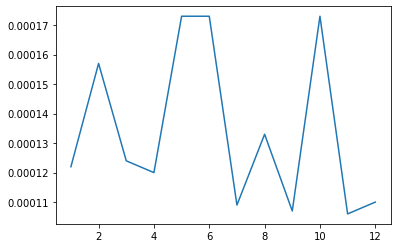

In [161]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0.000122, 0.000157, 0.000124, 0.000120, 0.000173, 0.000173, 0.000109, 0.000133, 0.000107, 0.000173, 0.000106, 0.000110])